**Analisis** **del** **Discriminante**

Subir el Archivo de Local a Colab

In [ ]:
# Subir el archivo desde tu PC a Colab
from google.colab import files
uploaded = files.upload()



Saving corazon.csv to corazon.csv


Modificar el nombre de corresponder

In [ ]:
# Cambia 'nombre_del_archivo.csv' por el nombre de tu archivo
import pandas as pd
df = pd.read_csv('corazon.csv')

Observamos si el dataset se importó bien

In [21]:
# Vista previa del dataset
print(df.head())



   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Observamos la cantidad de registros del dataset

In [22]:
#Cantidad de Observaciones del set de datos
len(df.index)

918

Importación de las librerias

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Correccion del set de datos de corresponder

In [24]:
# Verificar si hay valores nulos en el dataset
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [25]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
        'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

In [26]:
# Convertir variables categóricas a numéricas (si es necesario)
X = pd.get_dummies(X, drop_first=True)


In [38]:
X.head()  # Verifica cuántas columnas tiene X después de aplicar 'get_dummies'


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [27]:
# Definir y ajustar el modelo de LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [28]:
# Definir el método de evaluación
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [35]:
# Evaluar el modelo
import numpy as np
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Precisión promedio: {np.mean(scores)}')

Precisión promedio: 0.8663879598662206


In [46]:
# Definir una nueva observación (con valores reales de tu dataset)
nueva_observacion = [[40, 140, 289, 0, 172, 0.0, 1, 1, 0, 0, 1, 0, 0, 0, 1]]


# Se hace el mapeo
mapeo = {
    0: "No tiene enfermedad cardíaca",
    1: "Tiene enfermedad cardíaca"
}


#

# prediccion = model.predict(nueva_observacion)
categoria = mapeo[prediccion[0]]
print (f'Predicción para la nueva observación: {categoria}')


Predicción para la nueva observación: No tiene enfermedad cardíaca


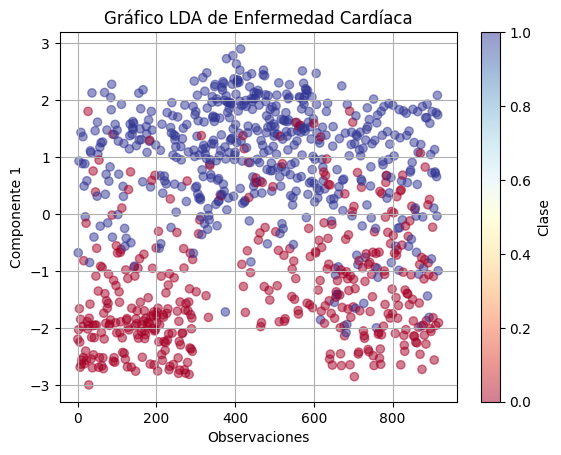

In [49]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Convertir variables categóricas a variables dummy
df_encoded = pd.get_dummies(df, drop_first=True)

# Define tus características y la variable objetivo
X = df_encoded.drop(columns=['HeartDisease'])  # Asegúrate de que 'HeartDisease' es tu variable objetivo
y = df_encoded['HeartDisease']

# Ajustar el modelo LDA y transformar los datos
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)

# Graficar el resultado
plt.figure()

# Dado que solo hay un componente, graficamos contra el índice
plt.scatter(np.arange(len(data_plot)), data_plot, c=y, cmap='RdYlBu', alpha=0.5)

# Añadir leyenda
plt.title('Gráfico LDA de Enfermedad Cardíaca')
plt.xlabel('Observaciones')
plt.ylabel('Componente 1')
plt.colorbar(label='Clase')
plt.grid()
plt.show()


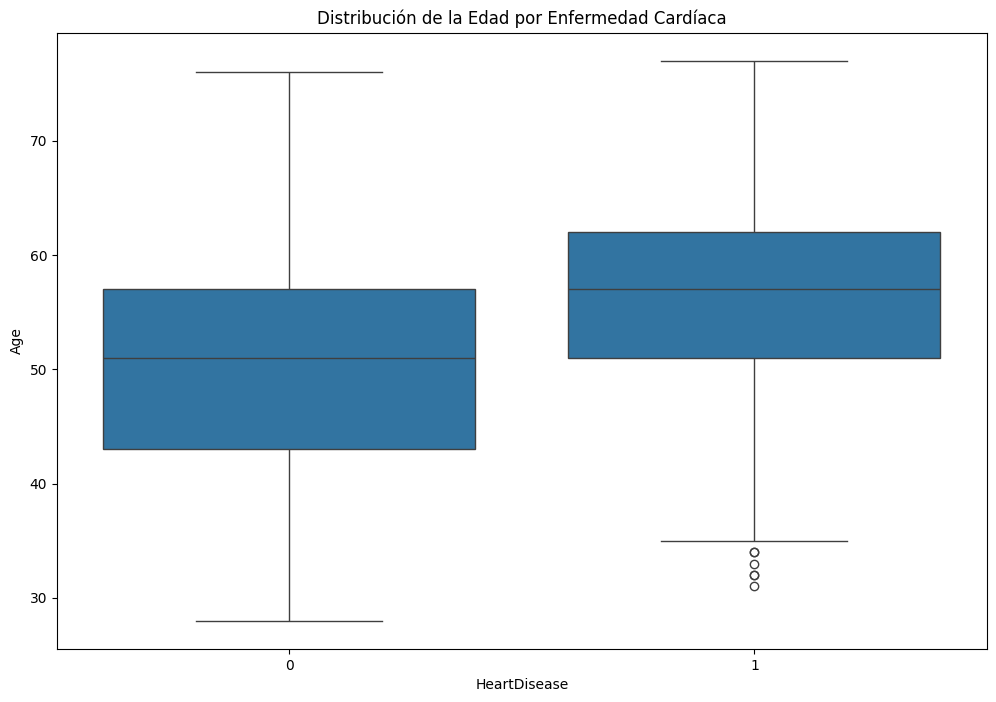

In [50]:
import seaborn as sns

# Graficar boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='HeartDisease', y='Age', data=df_encoded)
plt.title('Distribución de la Edad por Enfermedad Cardíaca')
plt.show()


**Matriz de Confusión**

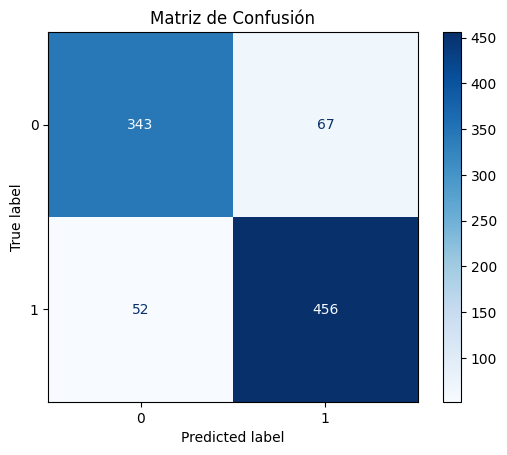

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X)  # Predicción en el conjunto de entrenamiento
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


**Histograma**

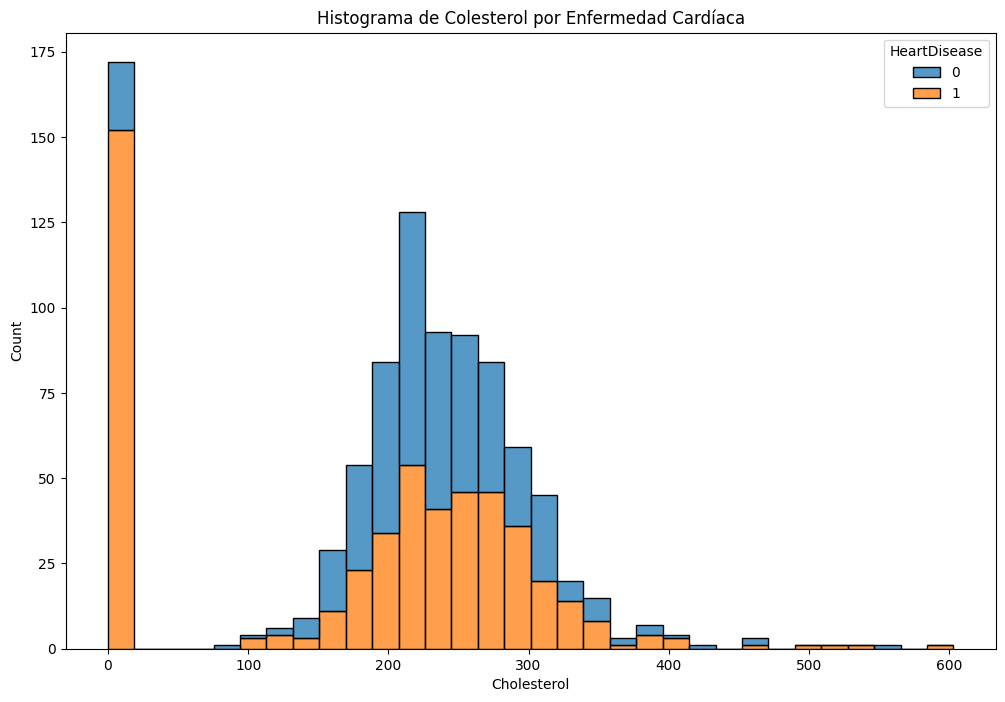

In [53]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_encoded, x='Cholesterol', hue='HeartDisease', multiple='stack')
plt.title('Histograma de Colesterol por Enfermedad Cardíaca')
plt.show()
